In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
pathways = pd.read_csv("ReactomePathways.txt", sep="\t", header=None, names=["PathwayID", "PathwayName", "Species"])
relations = pd.read_csv("ReactomePathwaysRelation.txt", sep="\t", header=None, names=["Parent", "Child"])
chebi_map = pd.read_csv("ChEBI2Reactome_All_Levels.txt", sep="\t", header=None,
                        names=["ChEBI_ID", "PathwayID", "URL", "PathwayName", "Evidence", "Species"])
chebi_map = chebi_map[chebi_map["Species"] == "Homo sapiens"]
print(chebi_map["PathwayID"].unique()[:10])

['R-HSA-1430728' 'R-HSA-196854' 'R-HSA-6806664' 'R-HSA-6806667'
 'R-HSA-2142753' 'R-HSA-556833' 'R-HSA-8848584' 'R-HSA-8978868'
 'R-HSA-9640463' 'R-HSA-162582']


In [31]:
print("Species count for Pathways")
pathways['Species'].value_counts()

Species count for Pathways


Species
Homo sapiens                  2803
Gallus gallus                 1803
Mus musculus                  1803
Rattus norvegicus             1791
Bos taurus                    1783
Sus scrofa                    1773
Canis familiaris              1755
Drosophila melanogaster       1571
Xenopus tropicalis            1550
Danio rerio                   1407
Caenorhabditis elegans        1398
Dictyostelium discoideum      1048
Schizosaccharomyces pombe      895
Saccharomyces cerevisiae       874
Plasmodium falciparum          650
Mycobacterium tuberculosis      13
Name: count, dtype: int64

In [34]:
chebi_map["Species"] = chebi_map["Species"].astype(str).str.strip()
chebi_map_human = chebi_map[chebi_map["Species"] == "Homo sapiens"]
chebi_map["ChEBI_ID"] = chebi_map["ChEBI_ID"].astype(str).str.replace("CHEBI:", "")

pathways = pd.read_csv("ReactomePathways.txt", sep="\t", header=None, names=["PathwayID", "PathwayName"])
pathways["PathwayID"] = pathways["PathwayID"].str.strip()
chebi_map = chebi_map.merge(pathways, on="PathwayID", how="left")

In [37]:
print("Number of unique ChEBI compounds:", chebi_map["ChEBI_ID"].nunique())
print("Number of unique pathways:", chebi_map["PathwayID"].nunique())
chebi_map = chebi_map[[
    "ChEBI_ID", "PathwayID", "PathwayName_x", "Evidence", "Species"
]].rename(columns={"PathwayName_x": "PathwayName"})

chebi_map_human.head()

Number of unique ChEBI compounds: 3035
Number of unique pathways: 2460


,ChEBI_ID,PathwayID,URL,PathwayName,Evidence,Species
12,10033,R-HSA-1430728,https://reactome.org/PathwayBrowser/#/R-HSA-14...,Metabolism,TAS,Homo sapiens
13,10033,R-HSA-196854,https://reactome.org/PathwayBrowser/#/R-HSA-19...,Metabolism of vitamins and cofactors,TAS,Homo sapiens
14,10033,R-HSA-6806664,https://reactome.org/PathwayBrowser/#/R-HSA-68...,Metabolism of vitamin K,TAS,Homo sapiens
15,10033,R-HSA-6806667,https://reactome.org/PathwayBrowser/#/R-HSA-68...,Metabolism of fat-soluble vitamins,TAS,Homo sapiens
74,10036,R-HSA-1430728,https://reactome.org/PathwayBrowser/#/R-HSA-14...,Metabolism,TAS,Homo sapiens


In [38]:
print("Missing pathway names:", chebi_map["PathwayName"].isna().sum())
print("Unique pathways after merge:", chebi_map["PathwayName"].nunique())

Missing pathway names: 0
Unique pathways after merge: 2443


In [41]:
print("Top 10 compounds by number of pathways:")
chebi_map.groupby("PathwayName")["PathwayID"].count().sort_values(ascending=False).head(10)

Top 10 compounds by number of pathways:


PathwayName
Metabolism                                   1804
Metabolism of lipids                          840
Disease                                       748
Signal Transduction                           578
Metabolism of proteins                        424
Infectious disease                            409
Signaling by GPCR                             399
Sensory Perception                            385
Metabolism of amino acids and derivatives     356
Transport of small molecules                  350
Name: PathwayID, dtype: int64

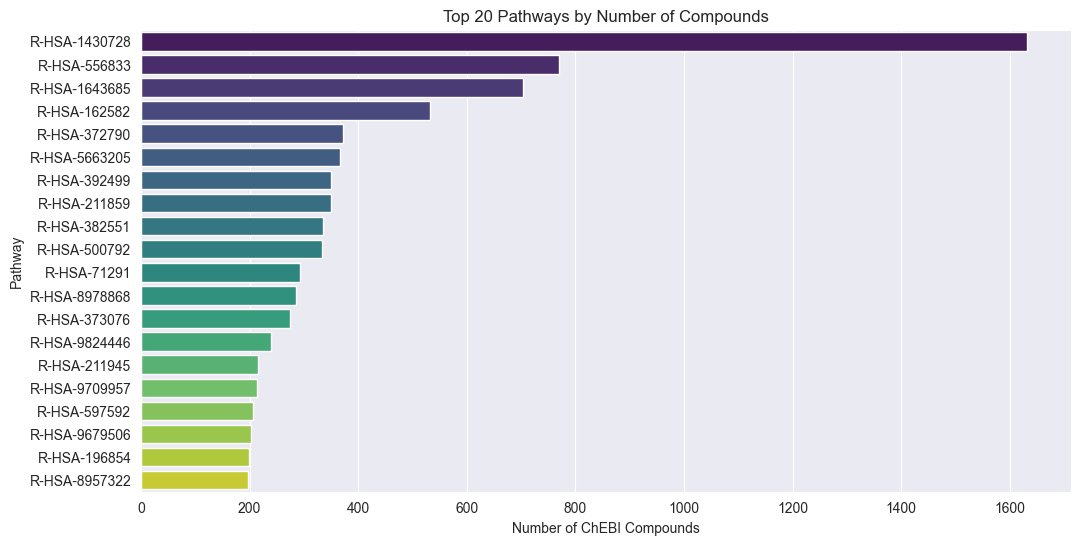

In [49]:
pathway_counts = chebi_map.groupby("PathwayID")["ChEBI_ID"].nunique().sort_values(ascending=False)

top20_pathways = pathway_counts.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top20_pathways.values, y=top20_pathways.index, palette="viridis")
plt.xlabel("Number of ChEBI Compounds")
plt.ylabel("Pathway")
plt.title("Top 20 Pathways by Number of Compounds")
plt.show()